In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
unrate = pd.read_csv('UNRATE.csv', header= None)

In [3]:
unrate.head()

,0,1
0,01-01-1948,3.4
1,01-02-1948,3.8
2,01-03-1948,4.0
3,01-04-1948,3.9
4,01-05-1948,3.5


In [4]:
unrate = unrate.rename(columns = {0:'Date', 1:'Unemployment Rate'})

In [5]:
unrate.head()

,Date,Unemployment Rate
0,01-01-1948,3.4
1,01-02-1948,3.8
2,01-03-1948,4.0
3,01-04-1948,3.9
4,01-05-1948,3.5


In [6]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               867 non-null    object 
 1   Unemployment Rate  867 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.7+ KB


In [7]:
unrate['Date'] = pd.to_datetime(unrate['Date'])

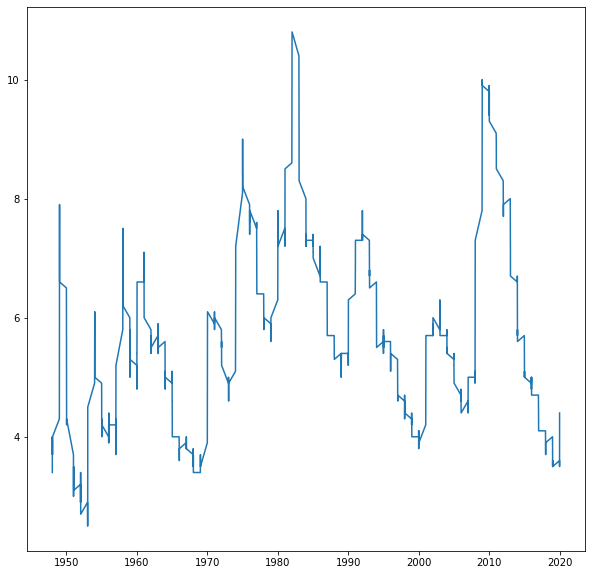

In [8]:
plt.figure(figsize = (10,10))
plt.plot(unrate['Date'], unrate['Unemployment Rate'])
plt.show()

In [9]:
train_len = 612
train = unrate[:train_len]
test = unrate.loc[train_len:]

In [10]:
train.shape

(612, 2)

In [11]:
train.tail()

,Date,Unemployment Rate
607,1998-01-08,4.5
608,1998-01-09,4.6
609,1998-01-10,4.5
610,1998-01-11,4.4
611,1998-01-12,4.4


In [12]:
test.shape

(255, 2)

In [13]:
test.head()

,Date,Unemployment Rate
612,1999-01-01,4.3
613,1999-01-02,4.4
614,1999-01-03,4.2
615,1999-01-04,4.3
616,1999-01-05,4.2


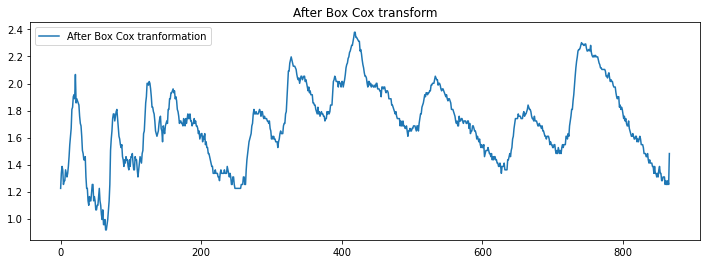

In [14]:
### Boxcox Transformation
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(unrate['Unemployment Rate'], lmbda = 0), index = unrate.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [15]:
data_boxcox_1 = pd.concat([unrate, data_boxcox], axis = 1)

In [16]:
data_boxcox_1 = data_boxcox_1.rename(columns = {0 : 'Boxcox Transformed'})

In [17]:
data_boxcox_1.head()

,Date,Unemployment Rate,Boxcox Transformed
0,1948-01-01,3.4,1.223775
1,1948-01-02,3.8,1.335001
2,1948-01-03,4.0,1.386294
3,1948-01-04,3.9,1.360977
4,1948-01-05,3.5,1.252763


In [18]:
data_boxcox_2 = data_boxcox_1.drop(['Unemployment Rate'], axis = 1)
data_boxcox_2.set_index(['Date'], inplace = True)
data_boxcox_2.head()

,Boxcox Transformed
Date,
1948-01-01,1.223775
1948-01-02,1.335001
1948-01-03,1.386294
1948-01-04,1.360977
1948-01-05,1.252763


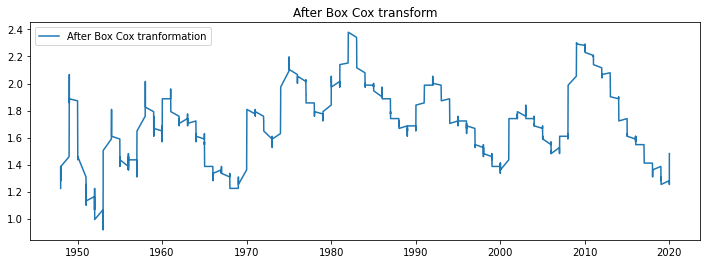

In [19]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_2, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

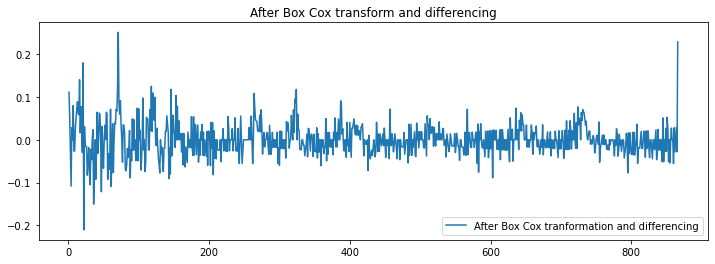

In [20]:
# Applying one order differencing

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), unrate.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [21]:
data_boxcox_diff

0           NaN
1      0.111226
2      0.051293
3     -0.025318
4     -0.108214
         ...   
862   -0.028171
863    0.000000
864    0.028171
865   -0.028171
866    0.228842
Length: 867, dtype: float64

In [22]:
data_boxcox_3 = data_boxcox_2.reset_index()

In [23]:
data_boxcox_3.head()

,Date,Boxcox Transformed
0,1948-01-01,1.223775
1,1948-01-02,1.335001
2,1948-01-03,1.386294
3,1948-01-04,1.360977
4,1948-01-05,1.252763


In [24]:
data_boxcox_diff_1 = pd.concat([data_boxcox_3, data_boxcox_diff], axis = 1)

In [25]:
data_boxcox_diff_1.head()

,Date,Boxcox Transformed,0
0,1948-01-01,1.223775,NaN
1,1948-01-02,1.335001,0.111226
2,1948-01-03,1.386294,0.051293
3,1948-01-04,1.360977,-0.025318
4,1948-01-05,1.252763,-0.108214


In [26]:
data_boxcox_diff_1 = data_boxcox_diff_1.rename(columns = {0 : 'Boxcox Differenced'})

In [27]:
data_boxcox_diff_2 = data_boxcox_diff_1.drop(['Boxcox Transformed'], axis = 1).set_index('Date')

In [28]:
data_boxcox_diff_2.head()

,Boxcox Differenced
Date,
1948-01-01,NaN
1948-01-02,0.111226
1948-01-03,0.051293
1948-01-04,-0.025318
1948-01-05,-0.108214


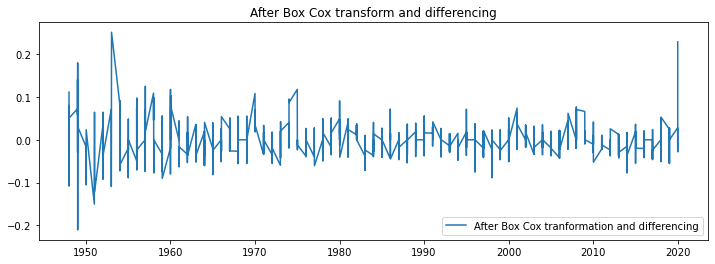

In [29]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff_2, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()